# Spike Sorting Algorithm

## The algorithm takes row signals recorded from different electrodes to identify the activity of different neurons recorded on the same electrode 
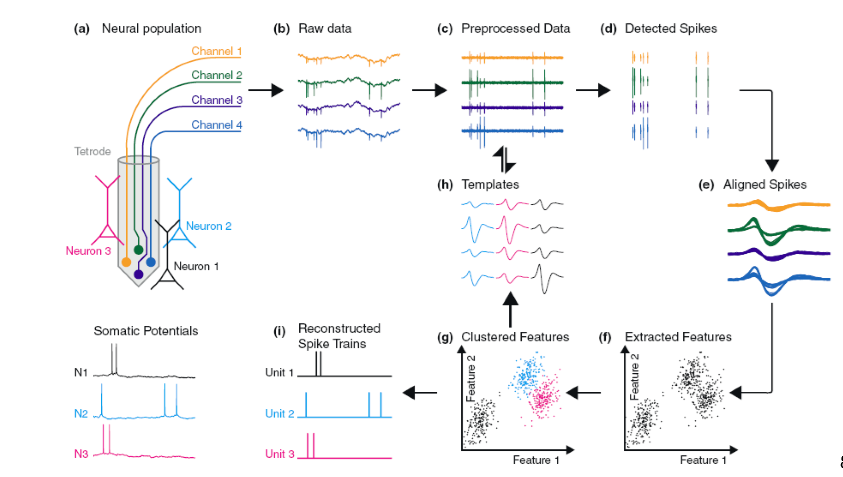

# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as s
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
#rectifying
def rectify(electrode1,electrode2):
    electrode1=np.absolute(electrode1)
    electrode2=np.absolute(electrode2)
    return electrode1,electrode2

In [3]:
def calculate_threshold(electrode1,hp):
    sub_set=electrode1[0:500]
    sd=np.std(sub_set)
    return sd*hp

In [4]:
def get_no_peaks(electrode, threshold):
    in_spike = False
    peak = 0
    peaks = np.array([])
    for i in range(0, electrode.shape[0]):
        if electrode[i] > threshold and in_spike == False:
            in_spike = True
            peak = i
        elif electrode[i] > threshold and in_spike == True:
            if electrode[i] > electrode[peak]:
                peak = i
        elif electrode[i] < threshold and in_spike == True:
            in_spike = False
            peaks = np.append(peaks, peak)
        else:
            continue
    return peaks

In [5]:
def get_spikes(electrode,peaks):
    spikes=np.array([])
    first_=True
    for peak in peaks:
        start=int(peak-24)
        end= int(peak+24)
        if start<0:
            continue
        elif end>electrode.shape[0]:
            continue
        else:
            spike = electrode[start:end]
            if first_==True:
                spikes = np.reshape(spikes, (0,spike.shape[0]))
                first_=False
            spikes=np.vstack((spikes,spike))
    return spikes

In [6]:
def _PCA_(spikes):
    pca=PCA(n_components=2)
    extracted_features=pca.fit_transform(spikes)
    return extracted_features

In [7]:
def kmeans_clustring(features,clusters):
    clustring=KMeans(n_clusters=clusters,random_state=5)
    clustring.fit(features)
    spike_label = clustring.predict(features)
    if features.shape[1]==2:
        x=features[:,0]*(10**5)
        y=features[:,1]*(10**5)
        plt.scatter(x, y, c=spike_label, s=50, cmap='viridis');
    centers = clustring.cluster_centers_
    return spike_label,centers

In [8]:
def plot_spikes(electrode,peaks,spikes_label):
    samples = np.arange(0,20000)
    
    sub_data=electrode[0:20000]
    plt.plot(samples,sub_data)
    peaks_values_c1=np.array([])
    peaks_values_c2=np.array([])
    pc1=np.array([])
    pc2=np.array([])
    peaks=peaks[peaks<20000]
    for i in range(0,peaks.shape[0]):
        peak_index=int(peaks[i])
        if spikes_label[i]==0:
            peaks_values_c1=np.append(peaks_values_c1,electrode[peak_index])
            pc1=np.append(pc1,peak_index)
        else:
            peaks_values_c2=np.append(peaks_values_c2,electrode[peak_index])
            pc2=np.append(pc2,peak_index)
    
    plt.plot(pc1,peaks_values_c1,'X')
    
    plt.plot(pc2,peaks_values_c2,'o')
    plt.show()

In [9]:
def clean_peaks(peaks):
    cleaned=np.array([])
    cleaned=np.append(cleaned,peaks[0])
    n=peaks.shape[0]
    for i in range(1,n):
        if i==(n-1):
            break
        if peaks[i+1]- peaks[i]>48:
            cleaned=np.append(cleaned,peaks[i+1])
    return peaks

# loading the Data

In [10]:

electrode_data=np.loadtxt("Data.txt")


In [11]:
electrode1=electrode_data[:,0]
electrode2=electrode_data[:,1]

print(np.amin(electrode1),np.amin(electrode2))

-0.00010651 -6.2904e-05


# Calculating thresholds and Peaks for each electrode data

In [12]:
# _e1_low -> some thing related to electrode 1 with low threshold 
# _e1_high -> some thing related to electrode 1 with high threshold 

# _e2_low -> some thing related to electrode 2 with low threshold 
# _e2_high -> some thing related to electrode 2 with high threshold 
# 



th_e1_low=calculate_threshold(electrode1,3.5)
th_e1_high=calculate_threshold(electrode1,5)
th_e2_low=calculate_threshold(electrode1,3.5)
th_e2_high=calculate_threshold(electrode1,5)

electrode1_R,electrode2_R=rectify(electrode1,electrode2)

peaks_e1_low=get_no_peaks(electrode1_R,th_e1_low)

peaks_e1_high=get_no_peaks(electrode1_R,th_e1_high)

peaks_e2_low=get_no_peaks(electrode2_R,th_e2_low)

peaks_e2_high=get_no_peaks(electrode2_R,th_e2_high)

In [13]:
spikes_e1_low=get_spikes(electrode1,peaks_e1_low)

spikes_e1_high=get_spikes(electrode1,peaks_e1_high)

spikes_e2_low=get_spikes(electrode2,peaks_e2_low)

spikes_e2_high=get_spikes(electrode2,peaks_e2_high)


# Plotting all spikes

### Electrode1 with low threshold

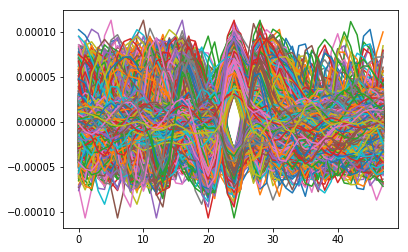

In [14]:
for spike in spikes_e1_low:
    plt.plot(spike)
plt.show()

### Electrode1 with high threshold

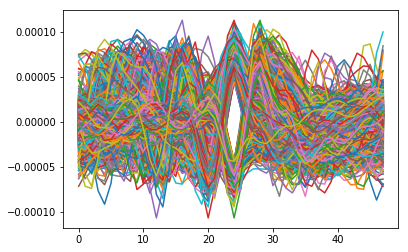

In [15]:
for spike in spikes_e1_high:
    plt.plot(spike)
plt.show()

### Electrode2 with low threshold

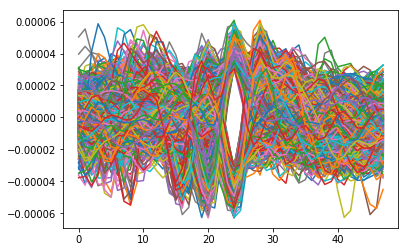

In [16]:
for spike in spikes_e2_low:
    plt.plot(spike)
plt.show()


### Electrode2 with high threshold

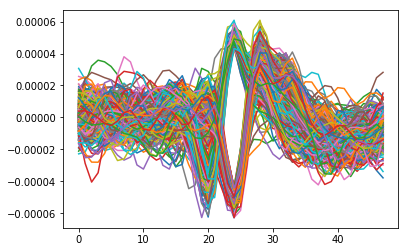

In [17]:
for spike in spikes_e2_high:
    plt.plot(spike)
plt.show()

# Extracted features

### Electrode1 with low threshold

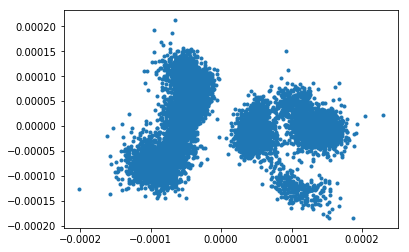

In [18]:
extracted_features_e1_low=_PCA_(spikes_e1_low)
x_e1_low=extracted_features_e1_low[:,0]
y_e1_low=extracted_features_e1_low[:,1]
plt.plot(x_e1_low,y_e1_low,'.')
plt.show()

### Electrode1 with high threshold

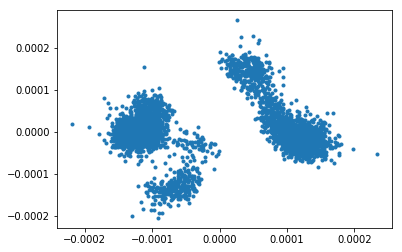

In [19]:
extracted_features_e1_high=_PCA_(spikes_e1_high)
x_e1_high=extracted_features_e1_high[:,0]
y_e1_high=extracted_features_e1_high[:,1]
plt.plot(x_e1_high,y_e1_high,'.')
plt.show()

### Electrode2 with low threshold

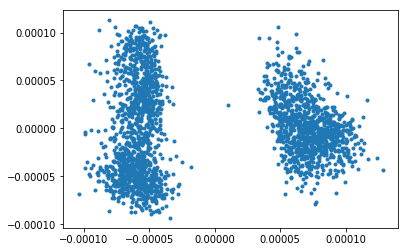

In [21]:
extracted_features_e2_low=_PCA_(spikes_e2_low)
x_e2_low=extracted_features_e2_low[:,0]
y_e2_low=extracted_features_e2_low[:,1]
plt.plot(x_e2_low,y_e2_low,'.')
plt.show()

### Electrode2 with high threshold

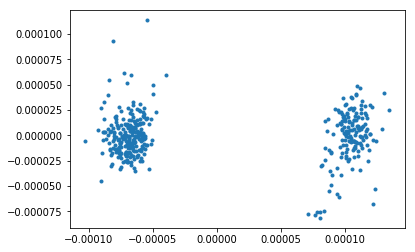

In [22]:
extracted_features_e2_high=_PCA_(spikes_e2_high)
x_e2_high=extracted_features_e2_high[:,0]
y_e2_high=extracted_features_e2_high[:,1]
plt.plot(x_e2_high,y_e2_high,'.')
plt.show()

# Clustered features

### Number of clusters =2 

### Electrode1 with low threshold

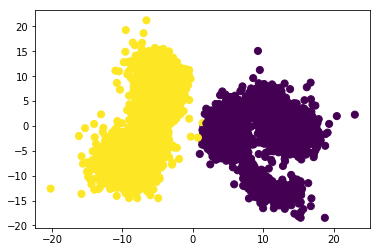

In [23]:
spike_label_e1_low,centers_e1_low=kmeans_clustring(extracted_features_e1_low,2)

### Electrode1 with high threshold

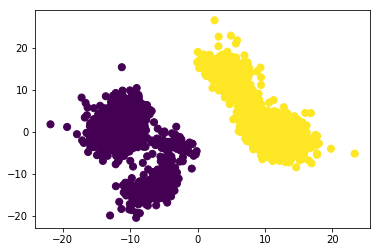

In [26]:
spike_label_e1_high,centers_e1_high=kmeans_clustring(extracted_features_e1_high,2)

### Electrode2 with low threshold

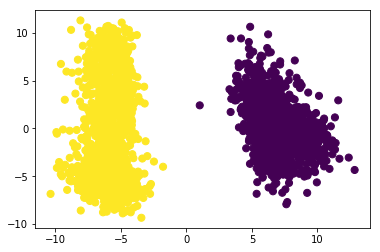

In [27]:
spike_label_e2_low,centers_e2_low=kmeans_clustring(extracted_features_e2_low,2)

### Electrode2 with high threshold

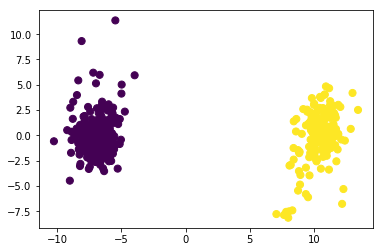

In [28]:
spike_label_e2_high,centers_e2_high=kmeans_clustring(extracted_features_e2_high,2)

# Templates

### Electrode1 with low threshold

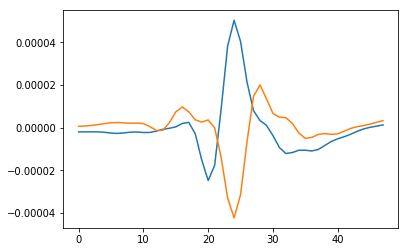

In [29]:
spike_label_e1_low,centers_e1_low=kmeans_clustring(spikes_e1_low,2)
plt.plot(centers_e1_low[0])
plt.plot(centers_e1_low[1])
plt.show()

### Electrode1 with high threshold

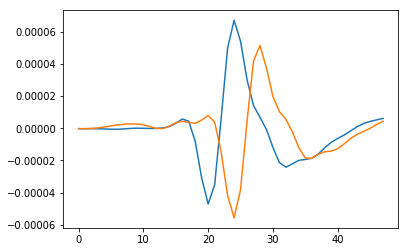

In [30]:
spike_label_e1_high,centers_e1_high=kmeans_clustring(spikes_e1_high,2)
plt.plot(centers_e1_high[0])
plt.plot(centers_e1_high[1])
plt.show()

### Electrode2 with low threshold

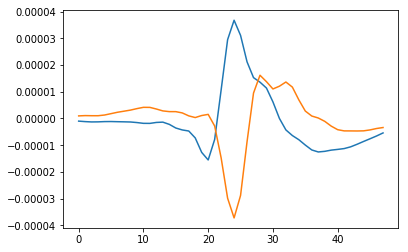

In [31]:
spike_label_e2_low,centers_e2_low=kmeans_clustring(spikes_e2_low,2)
plt.plot(centers_e2_low[0])
plt.plot(centers_e2_low[1])
plt.show()

### Electrode2 with high threshold

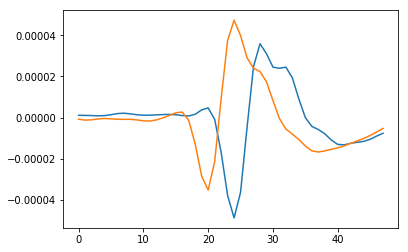

In [32]:
spike_label_e2_high,centers_e2_high=kmeans_clustring(spikes_e2_high,2)
plt.plot(centers_e2_high[0])
plt.plot(centers_e2_high[1])
plt.show()

# showing 20,000 samples of the row data

### Electrode1 with low threshold

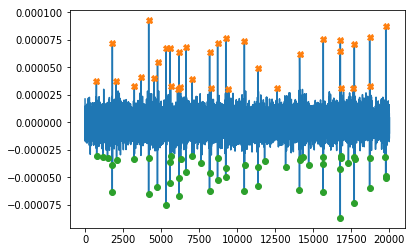

In [33]:
plot_spikes(electrode1,peaks_e1_low,spike_label_e1_low)

### Electrode1 with high threshold

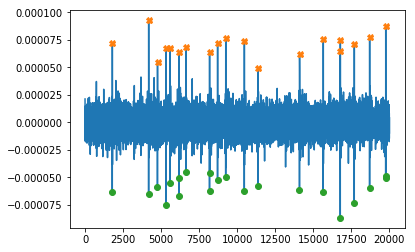

In [34]:
plot_spikes(electrode1,peaks_e1_high,spike_label_e1_high)

### Electrode2 with low threshold

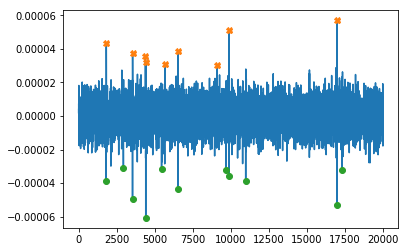

In [36]:
plot_spikes(electrode2,peaks_e2_low,spike_label_e2_low)

### Electrode2 with high threshold

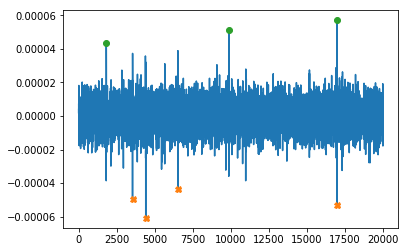

In [37]:
plot_spikes(electrode2,peaks_e2_high,spike_label_e2_high)